# Execution Probability - Part 1 - Limit Orders & Cancel Orders

In [173]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Quantities of the days:

| Days / Weeks |   Week 1   |   Week 2   |   Week 3   |   Week 4   |   Week 5   |   Week 6   |   Week 7   |   Week 8   |   Week 9   |
|--------------|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|
| Monday       |      -     | 07.08.2017 | 14.08.2017 | 21.08.2017 | 28.08.2017 |      -     | 11.09.2017 | 18.09.2017 | 25.09.2017 |
| Tuesday      | 01.08.2017 | 08.08.2017 | 15.08.2017 | 22.08.2017 | 29.08.2017 | 05.09.2017 | 12.09.2017 | 19.09.2017 | 26.09.2017 |
| Wednesday    | 02.08.2017 | 09.08.2017 | 16.08.2017 | 23.08.2017 |      -     | 06.09.2017 | 13.09.2017 | 20.09.2017 | 27.09.2017 |
| Thursday     | 03.08.2017 | 10.08.2017 | 17.08.2017 | 24.08.2017 |      -     | 07.09.2017 | 14.09.2017 | 21.09.2017 | 28.09.2017 |
| Friday       | 04.08.2017 | 11.08.2017 | 18.08.2017 | 25.08.2017 |      -     | 08.09.2017 | 15.09.2017 | 22.09.2017 | 29.09.2017 |

## Extracting Limit and Market Order Quantities

In [226]:
limit_orders = pd.read_csv('Quantities/limit_orders.csv')

# Haftalik ortalama, ticklere gelen limit order quantityleri
limit_buy_orders_mean_weekly = []
limit_sell_orders_mean_weekly = []
# ---------------------------------------------------------

weeks_in_months = [
    range(0,7,2),
    range(8,17,2),
    range(18,27,2),
    range(28,37,2),
    range(38,41,2),
    range(42,49,2),
    range(50,59,2),
    range(60,69,2),
    range(70,79,2)
]

days_in_week = [4, 5, 5, 5, 2, 4, 5, 5, 5]
days_in_months = [21, 19]
week_number = 9

for week in weeks_in_months:
    week_lb = []
    week_ls = []
    week_cb = []
    week_cs = []
    
    for day in week:
        week_lb.append(list(map(int,limit_orders.as_matrix()[day][1:])))
        week_ls.append(list(map(int,limit_orders.as_matrix()[day+1][1:])))
        
    limit_buy_orders_mean_weekly.append(list(map(int, np.mean(np.array(week_lb), axis = 0))))
    limit_sell_orders_mean_weekly.append(list(map(int, np.mean(np.array(week_ls), axis = 0))))

In [253]:
import os
import re

hourly_name = os.listdir('./Quantities/Hourly_Limit')
hourly_name.sort()

limit_market_name = os.listdir('./Quantities/Limit_Market')
limit_market_name.sort()

i = 0

# Her hafta icin 7 saat araliginda 15 ticke gelen ortalama quantityler
limit_buy_hourly_quantity_weekly = []
limit_sell_hourly_quantity_weekly = []
# -------------------------------------------------------------------

# Haftalik ortalama, 7 saat araligi icin gelen toplam quantity miktarlari
limit_buy_quantity_weekly = []
limit_sell_quantity_weekly = []
market_buy_quantity_weekly = []
market_sell_quantity_weekly = []
# -----------------------------------------------------------------------

for days in days_in_week:
    week_lb = []
    week_ls = []
    week_mb = []
    week_ms = []
    for j in range(days):
        limit_market = pd.read_csv('Quantities/Limit_Market/' + limit_market_name[i])
        week_lb.append(np.array(list(map(int,limit_market.as_matrix()[0][1:]))))
        week_ls.append(np.array(list(map(int,limit_market.as_matrix()[1][1:]))))
        week_mb.append(np.array(list(map(int,limit_market.as_matrix()[2][1:]))))
        week_ms.append(np.array(list(map(int,limit_market.as_matrix()[3][1:]))))
        i += 1
        
    limit_buy_quantity_weekly.append(list(map(int,np.mean(week_lb, axis=0))))
    limit_sell_quantity_weekly.append(list(map(int,np.mean(week_ls, axis=0))))
    market_buy_quantity_weekly.append(list(map(int, np.mean(week_mb, axis=0))))
    market_sell_quantity_weekly.append(list(map(int, np.mean(week_ms, axis=0))))
    
i = 0

for days in days_in_week:
    
    week_mb = []
    week_ms = []
    lb_hourly_week = [[] for y in range(7)]
    ls_hourly_week = [[] for y in range(7)]
    
    for j in range(days):
        
        limit_market = pd.read_csv('Quantities/Hourly_Limit/' + hourly_name[i])
        
        for k in range(7):
            lb_hourly_week[k].append(np.array(list(map(int,limit_market.as_matrix()[k][1:]))))
            ls_hourly_week[k].append(np.array(list(map(int,limit_market.as_matrix()[k+7][1:]))))
            

        i += 1
    
    week_quant_lb = []
    week_quant_ls = []
    
    for z in range(7):
        week_quant_lb.append(list(map(int, np.mean(lb_hourly_week[z], axis = 0))))
        week_quant_ls.append(list(map(int, np.mean(ls_hourly_week[z], axis = 0))))
        
    limit_buy_hourly_quantity_weekly.append(week_quant_lb)
    limit_sell_hourly_quantity_weekly.append(week_quant_ls)

# Quantities

## Weekly Mean Limit Orders Quantities

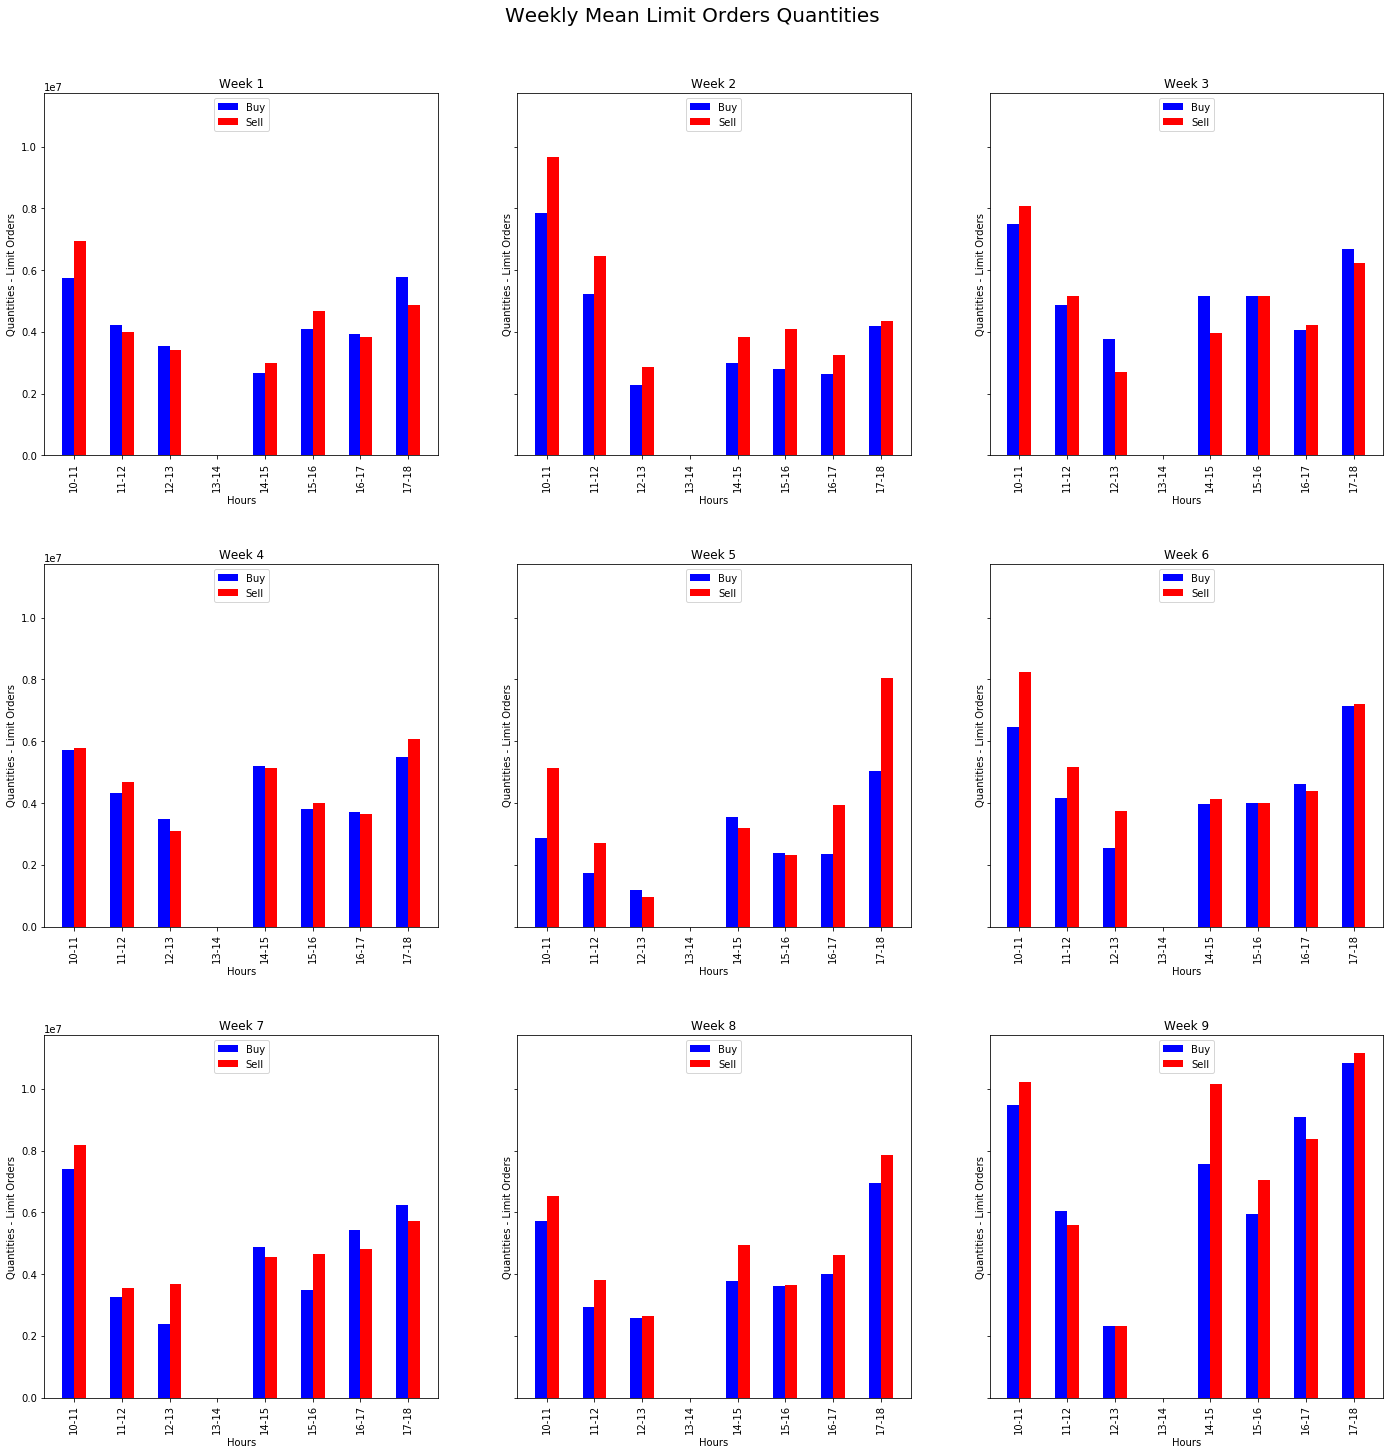

In [340]:
X = np.array([10, 11, 12, 14, 15, 16, 17])
f, axes = plt.subplots(3, 3, sharey=True, figsize=(24,24))

f.suptitle("Weekly Mean Limit Orders Quantities", fontsize=20, y = 0.93)
hour_name = ['09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18']
k = 0

plt.subplots_adjust(hspace=0.3)

for i in range(3):
    for j in range(3):
        axes[i, j].bar(X - 0.125, limit_buy_quantity_weekly[k], color='b', width=0.25, label='Buy')
        axes[i, j].bar(X + 0.125, limit_sell_quantity_weekly[k], color='r', width=0.25, label='Sell')
        axes[i, j].legend(loc=9)
        axes[i, j].title.set_text('Week ' + str(k+1))
        axes[i, j].set_ylabel("Quantities - Limit Orders")
        axes[i, j].set_xlabel("Hours", y=1.06)
        axes[i,j].set_xticklabels(hour_name, rotation=90)
        k += 1

## Monthly Mean Market Orders Quantities

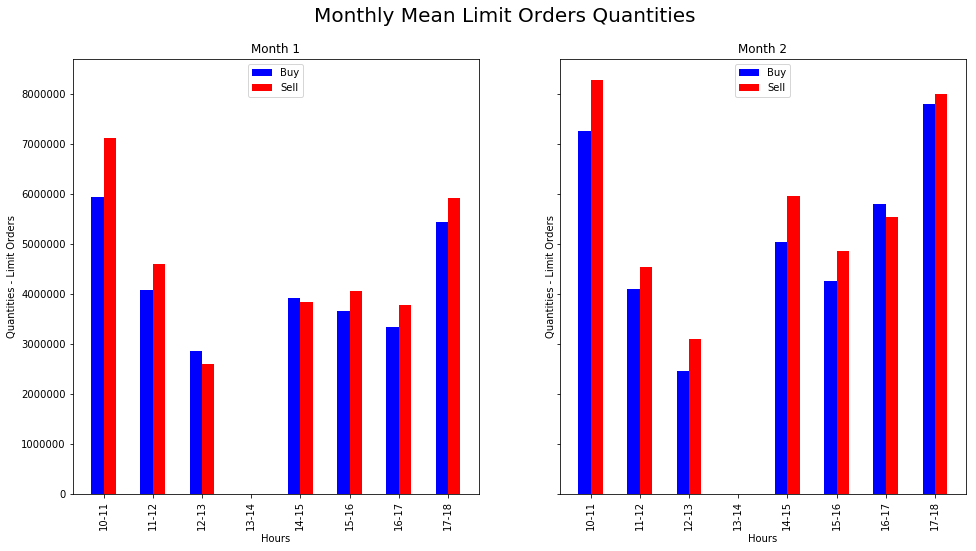

In [354]:
X = np.array([10, 11, 12, 14, 15, 16, 17])
f, axes = plt.subplots(1, 2, sharey=True, figsize=(16,8))

f.suptitle("Monthly Mean Limit Orders Quantities", fontsize=20, y = 0.97)
hour_name = ['09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18']
k = 0

lb_monthly = [
    np.mean(np.array(limit_buy_quantity_weekly[0:5][:]), axis = 0),
    np.mean(np.array(limit_buy_quantity_weekly[5:9][:]), axis = 0)
]

ls_monthly = [
    np.mean(np.array(limit_sell_quantity_weekly[0:5][:]), axis = 0),
    np.mean(np.array(limit_sell_quantity_weekly[5:9][:]), axis = 0)
]
    

for i in range(2):
    axes[i].bar(X - 0.125, list(map(int, lb_monthly[i])), color='b', width=0.25, label='Buy')
    axes[i].bar(X + 0.125, list(map(int, ls_monthly[i])), color='r', width=0.25, label='Sell')
    axes[i].legend(loc=9)
    axes[i].title.set_text('Month ' + str(k+1))
    axes[i].set_ylabel("Quantities - Limit Orders")
    axes[i].set_xlabel("Hours", y=1.06)
    axes[i].set_xticklabels(hour_name, rotation=90)
    k += 1

## Weekly Mean Market Orders Quantities

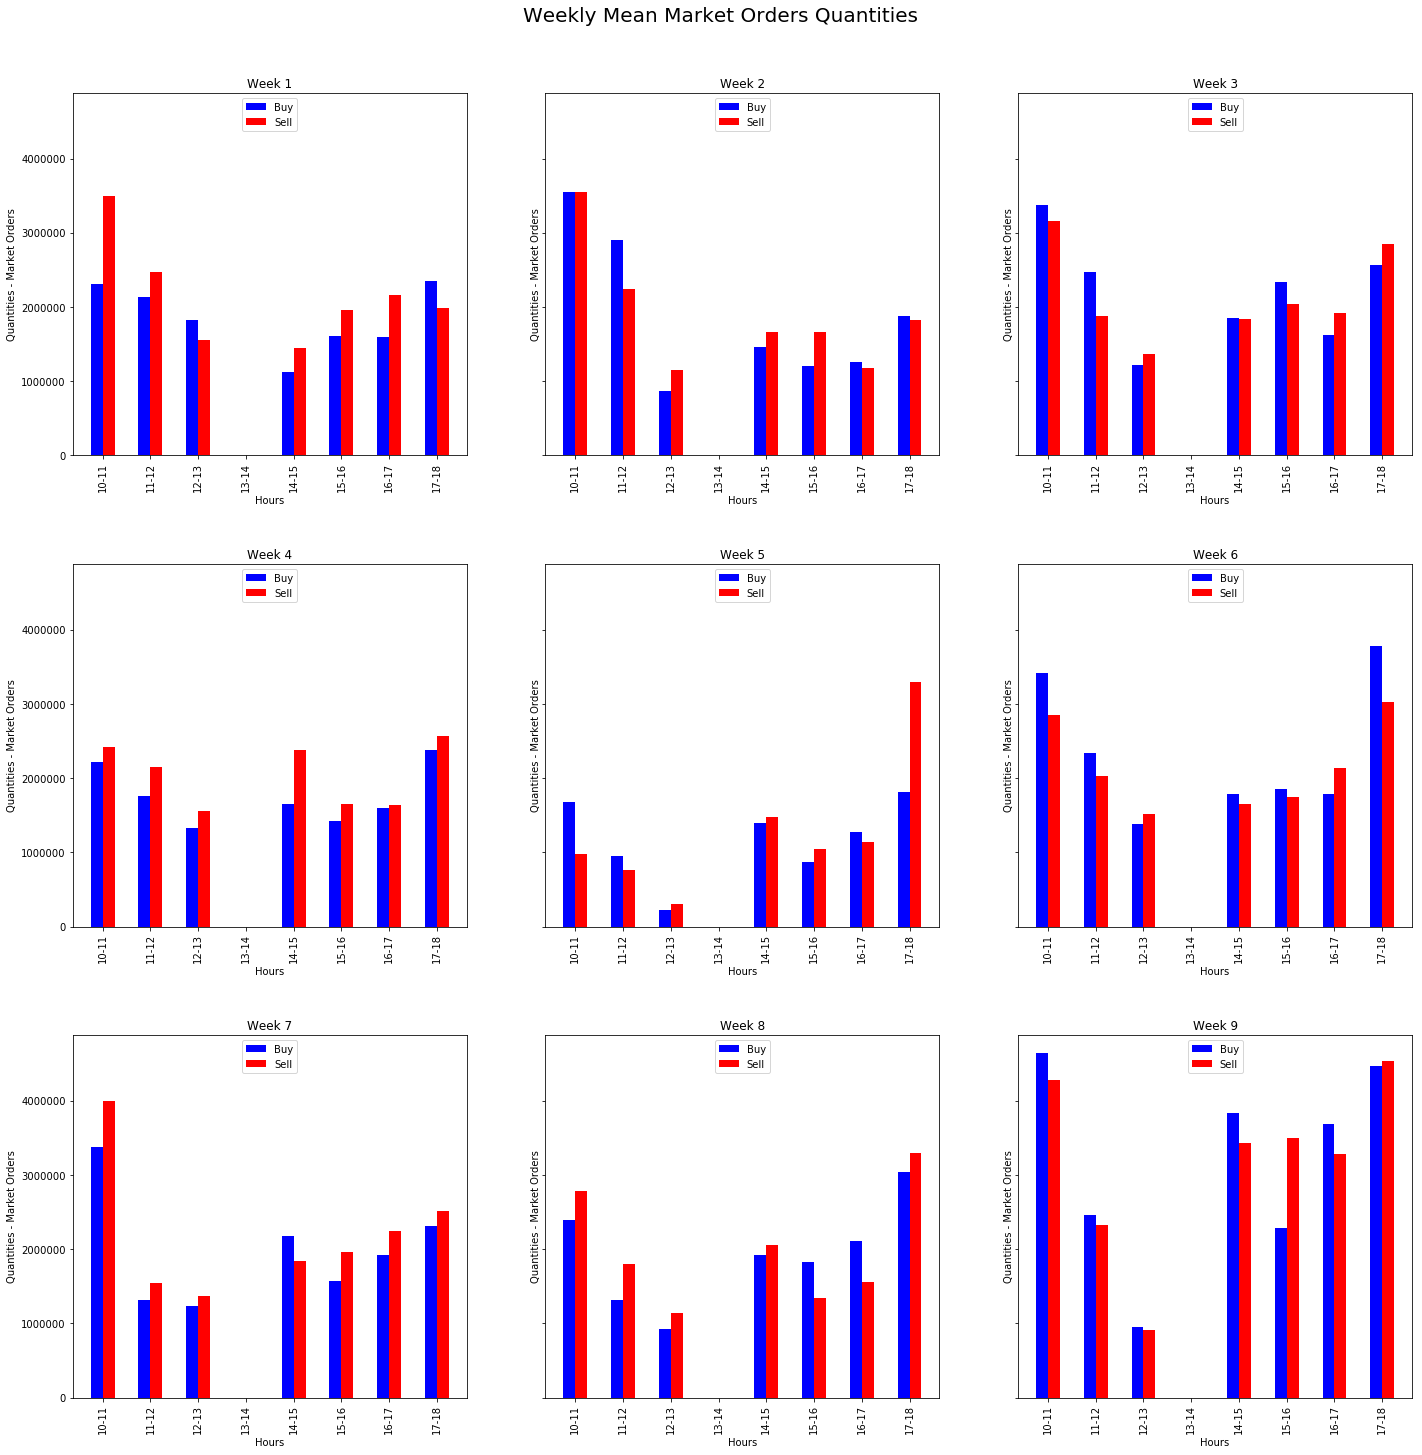

In [341]:
X = np.array([10, 11, 12, 14, 15, 16, 17])
f, axes = plt.subplots(3, 3, sharey=True, figsize=(24,24))

f.suptitle("Weekly Mean Market Orders Quantities", fontsize=20, y = 0.93)
hour_name = ['09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18']
k = 0

plt.subplots_adjust(hspace=0.3)

for i in range(3):
    for j in range(3):
        axes[i, j].bar(X - 0.125, market_buy_quantity_weekly[k], color='b', width=0.25, label='Buy')
        axes[i, j].bar(X + 0.125, market_sell_quantity_weekly[k], color='r', width=0.25, label='Sell')
        axes[i, j].legend(loc=9)
        axes[i, j].title.set_text('Week ' + str(k+1))
        axes[i, j].set_ylabel("Quantities - Market Orders")
        axes[i, j].set_xlabel("Hours", y=1.06)
        axes[i,j].set_xticklabels(hour_name, rotation=90)
        k += 1

## Monthly Mean Market Orders Quantities

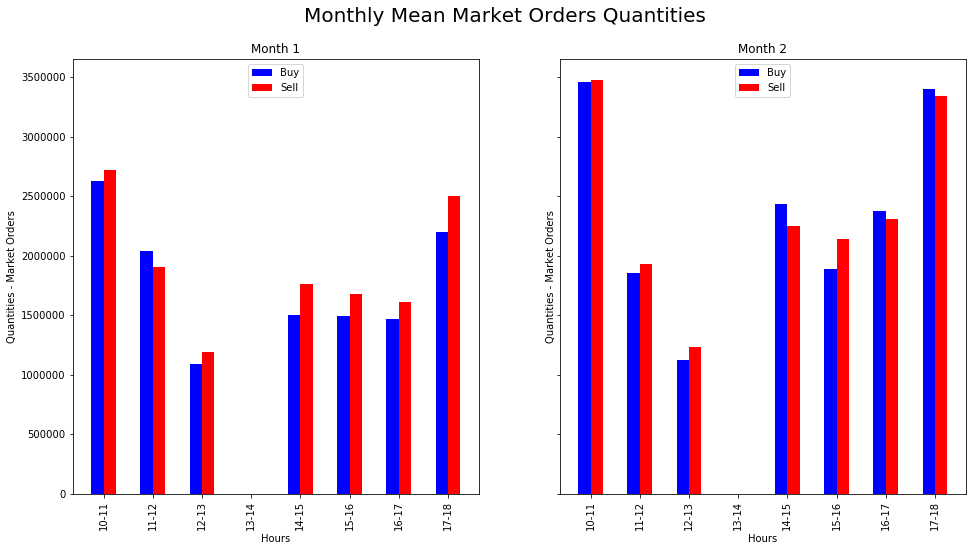

In [355]:
X = np.array([10, 11, 12, 14, 15, 16, 17])
f, axes = plt.subplots(1, 2, sharey=True, figsize=(16,8))

f.suptitle("Monthly Mean Market Orders Quantities", fontsize=20, y = 0.97)
hour_name = ['09-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18']
k = 0

lb_monthly = [
    np.mean(np.array(market_buy_quantity_weekly[0:5][:]), axis = 0),
    np.mean(np.array(market_buy_quantity_weekly[5:9][:]), axis = 0)
]

ls_monthly = [
    np.mean(np.array(market_sell_quantity_weekly[0:5][:]), axis = 0),
    np.mean(np.array(market_sell_quantity_weekly[5:9][:]), axis = 0)
]
    

for i in range(2):
    axes[i].bar(X - 0.125, list(map(int, lb_monthly[i])), color='b', width=0.25, label='Buy')
    axes[i].bar(X + 0.125, list(map(int, ls_monthly[i])), color='r', width=0.25, label='Sell')
    axes[i].legend(loc=9)
    axes[i].title.set_text('Month ' + str(k+1))
    axes[i].set_ylabel("Quantities - Market Orders")
    axes[i].set_xlabel("Hours", y=1.06)
    axes[i].set_xticklabels(hour_name, rotation=90)
    k += 1

# Arrived Limit Orders to Ticks

## Weekly & Monthly Mean of Arrived Limit Buy Order Quantities to Ticks

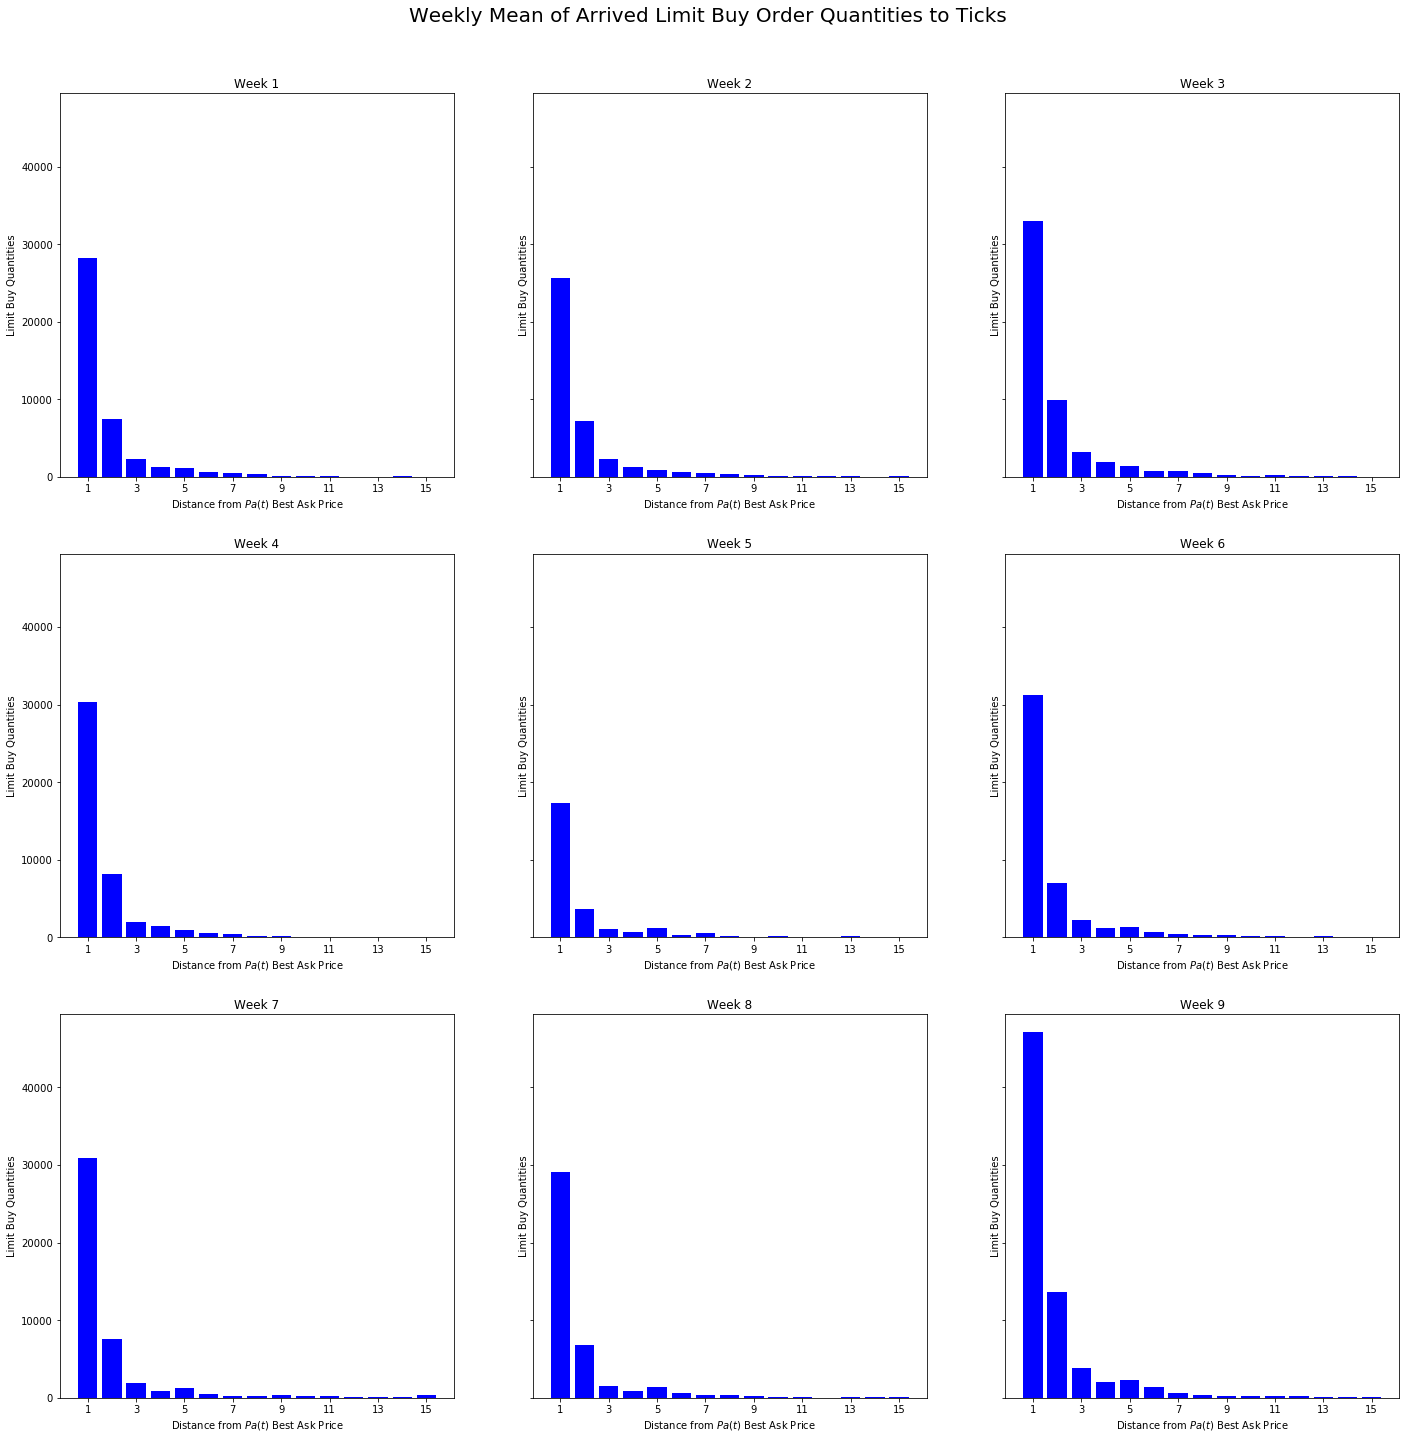

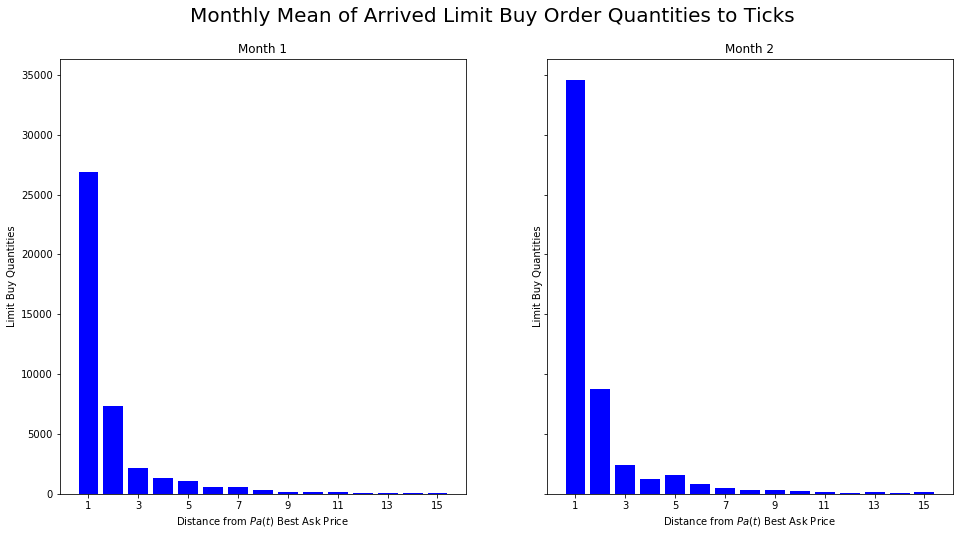

In [372]:
X = np.arange(1,16)
f, axes = plt.subplots(3, 3, sharey=True, figsize=(24,24))
f.suptitle('Weekly Mean of Arrived Limit Buy Order Quantities to Ticks', fontsize=20, y = 0.93)
k = 0

for i in range(3):
    for j in range(3):
        axes[i, j].bar(X, limit_buy_orders_mean_weekly[k], color='b')
        axes[i, j].set_ylabel('Limit Buy Quantities')
        axes[i, j].set_xlabel('Distance from $Pa(t)$ Best Ask Price')
        axes[i, j].title.set_text('Week ' + str(k+1))
        axes[i, j].set_xticks(np.arange(1,16,2))
        k += 1 
        
f, axes = plt.subplots(1, 2, sharey=True, figsize=(16,8))
f.suptitle('Monthly Mean of Arrived Limit Buy Order Quantities to Ticks', fontsize=20, y = 0.97)
k = 0

result = np.mean(np.array(limit_buy_orders_mean_weekly[0:5]), axis = 0)

for i in range(2):
    axes[i].bar(X, result, color='b')
    axes[i].set_ylabel('Limit Buy Quantities')
    axes[i].set_xlabel('Distance from $Pa(t)$ Best Ask Price')
    axes[i].title.set_text('Month ' + str(i+1))
    axes[i].set_xticks(np.arange(1,16,2))
    result = np.mean(np.array(limit_buy_orders_mean_weekly[5:9]), axis = 0)

## Weekly & Monthly Mean of Arrived Limit Sell Order Quantities to Ticks

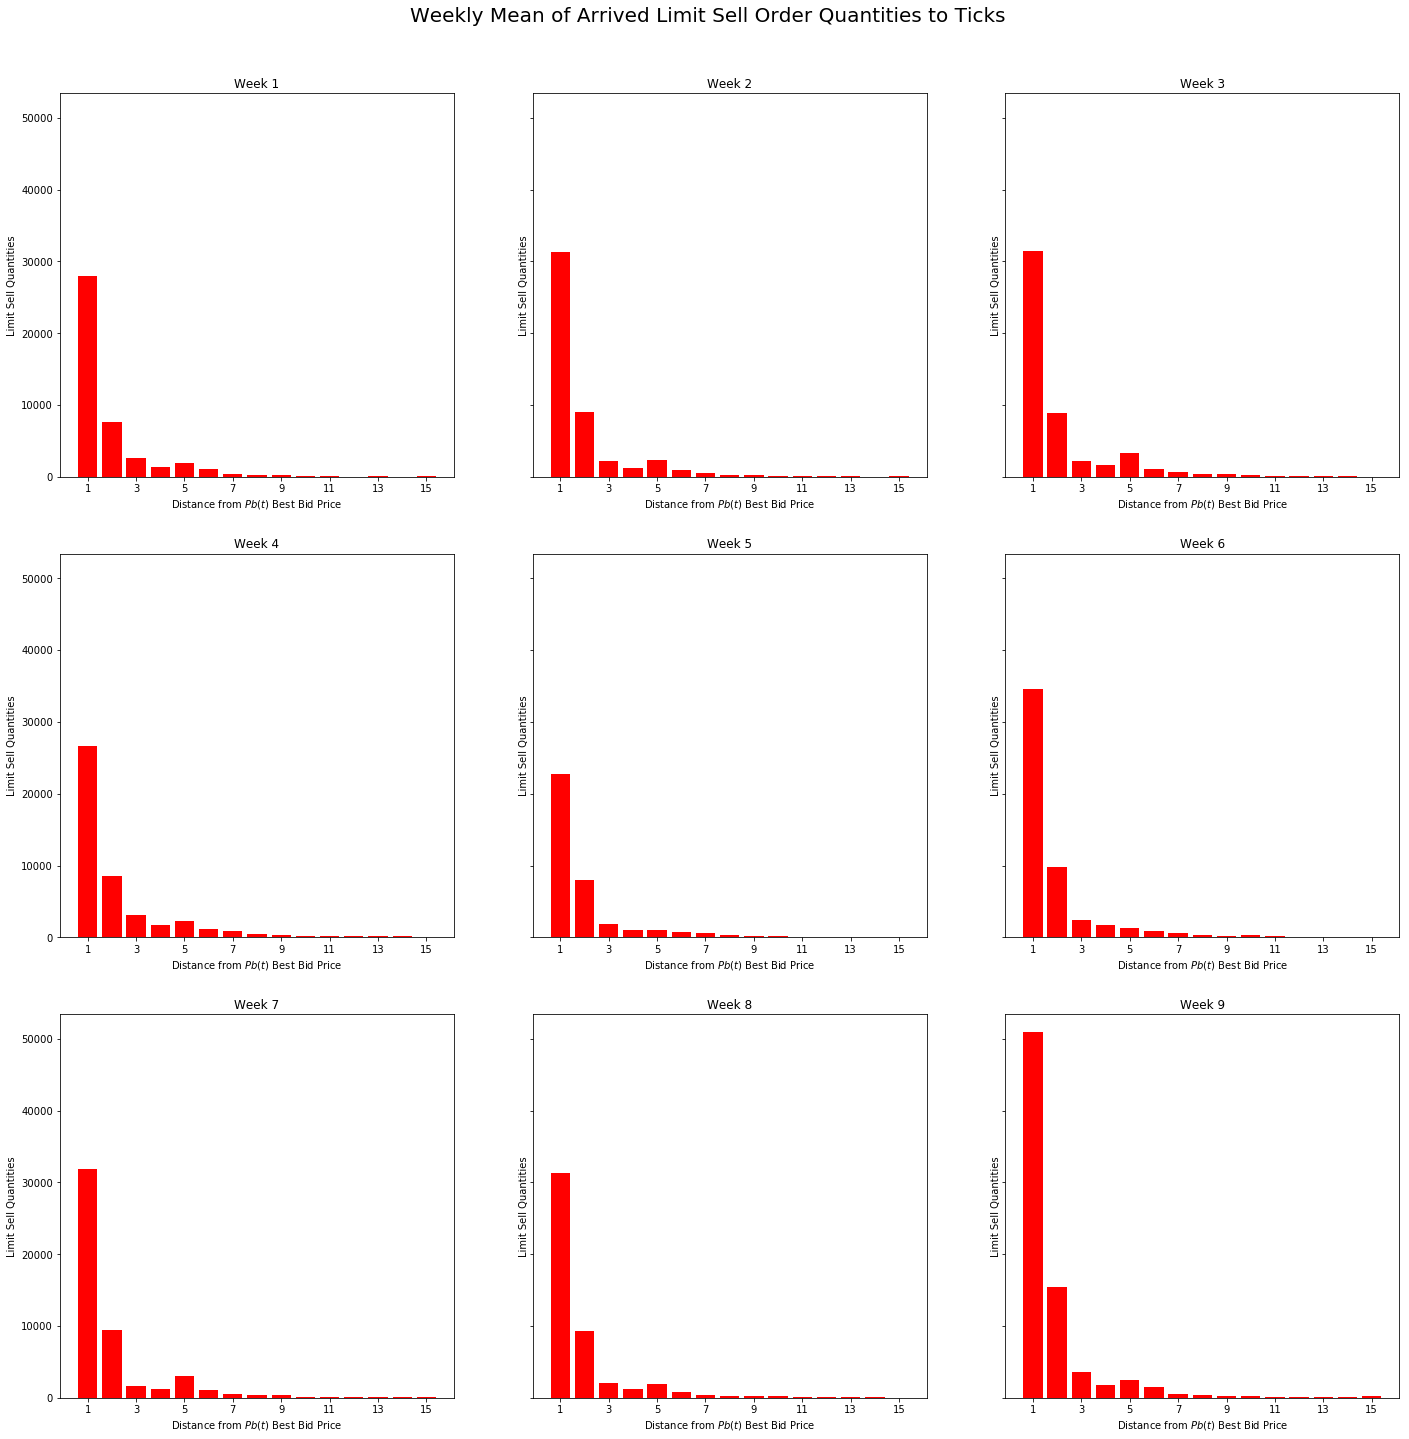

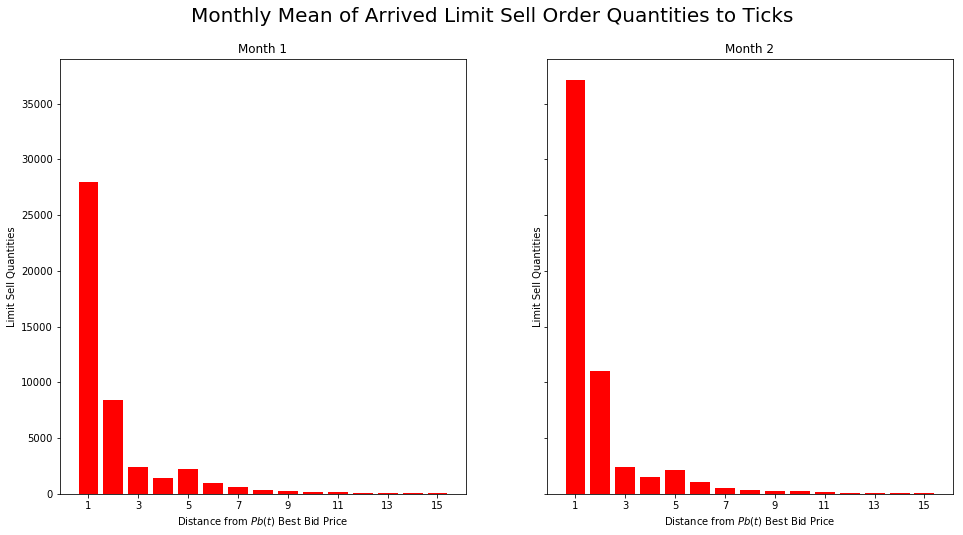

In [373]:
X = np.arange(1,16)
f, axes = plt.subplots(3, 3, sharey=True, figsize=(24,24))
f.suptitle('Weekly Mean of Arrived Limit Sell Order Quantities to Ticks', fontsize=20, y = 0.93)
k = 0

for i in range(3):
    for j in range(3):
        axes[i, j].bar(X, limit_sell_orders_mean_weekly[k], color='r')
        axes[i, j].set_ylabel('Limit Sell Quantities')
        axes[i, j].set_xlabel('Distance from $Pb(t)$ Best Bid Price')
        axes[i, j].title.set_text('Week ' + str(k+1))
        axes[i, j].set_xticks(np.arange(1,16,2))
        k += 1 
        
f, axes = plt.subplots(1, 2, sharey=True, figsize=(16,8))
f.suptitle('Monthly Mean of Arrived Limit Sell Order Quantities to Ticks', fontsize=20, y = 0.97)
k = 0

result = np.mean(np.array(limit_sell_orders_mean_weekly[0:5]), axis = 0)

for i in range(2):
    axes[i].bar(X, result, color='r')
    axes[i].set_ylabel('Limit Sell Quantities')
    axes[i].set_xlabel('Distance from $Pb(t)$ Best Bid Price')
    axes[i].title.set_text('Month ' + str(i+1))
    axes[i].set_xticks(np.arange(1,16,2))
    result = np.mean(np.array(limit_sell_orders_mean_weekly[5:9]), axis = 0)

## Weekly & Monthly Mean of Hourly Arrived Limit Sell Order Quantities to Ticks

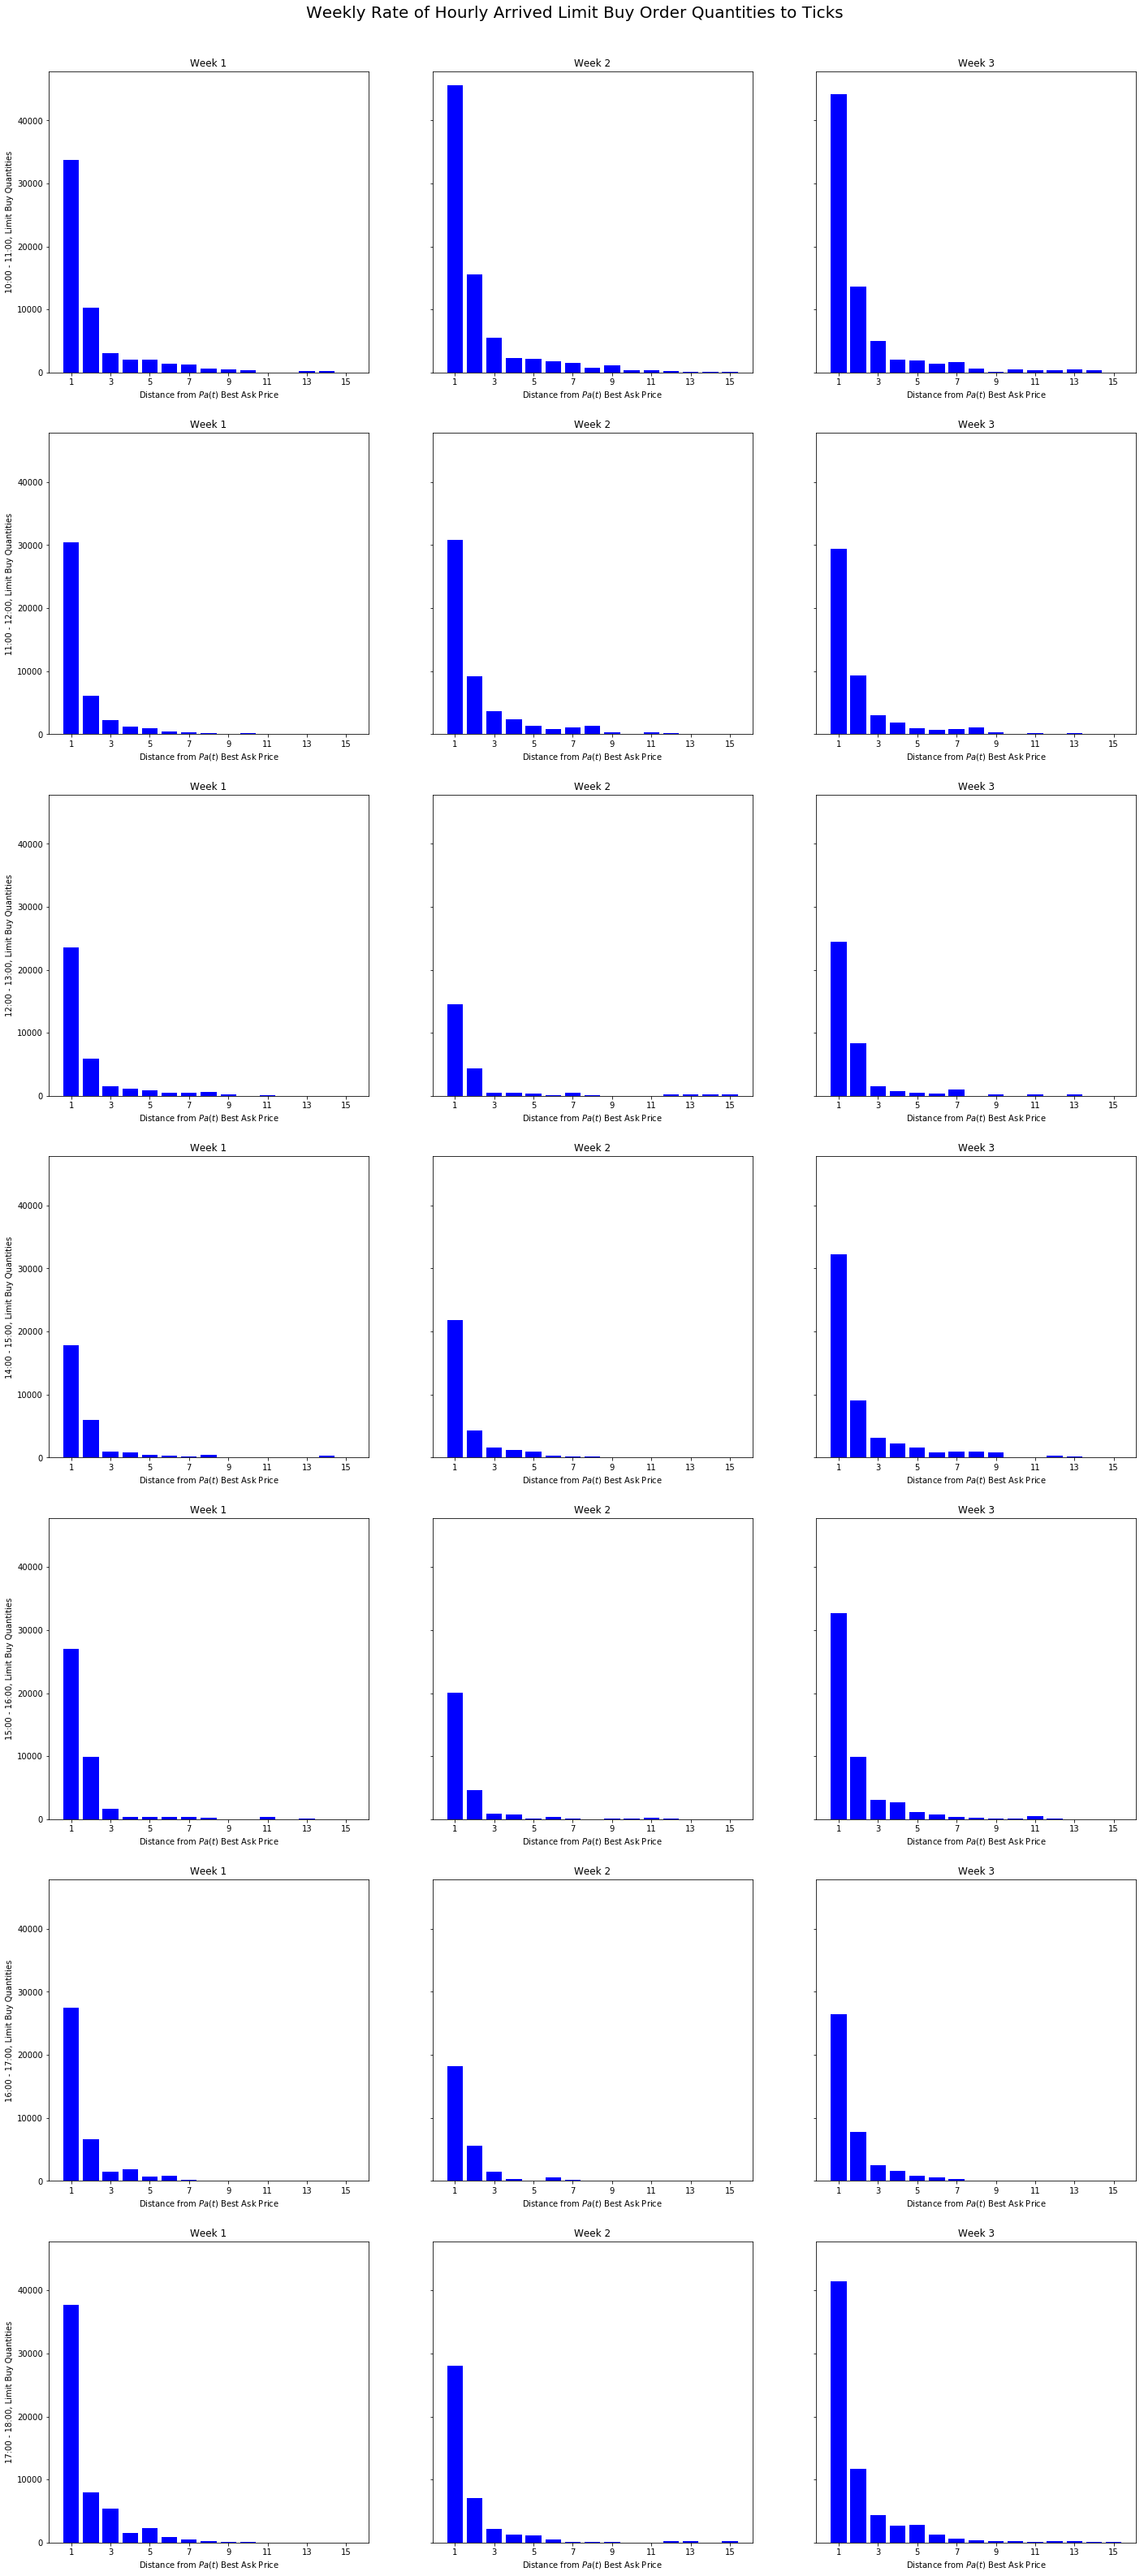

In [391]:
X = np.arange(1,16)
f, axes = plt.subplots(7, 3, sharey=True, figsize=(24,56))
f.suptitle('Weekly Rate of Hourly Arrived Limit Buy Order Quantities to Ticks', fontsize=20, y =.9)

hours = ['10:00 - 11:00', '11:00 - 12:00', '12:00 - 13:00', '14:00 - 15:00', '15:00 - 16:00', '16:00 - 17:00',
        '17:00 - 18:00']

for i in range(7):
    for j in range(3):
        axes[i, j].bar(X, limit_buy_hourly_quantity_weekly[j][i], color='b')
        axes[i, j].title.set_text('Week ' + str(j+1))
        axes[i, 0].set_ylabel('{}, Limit Buy Quantities'.format(hours[i]))
        axes[i, j].set_xlabel('Distance from $Pa(t)$ Best Ask Price')
        axes[i, j].set_xticks(np.arange(1,16,2))

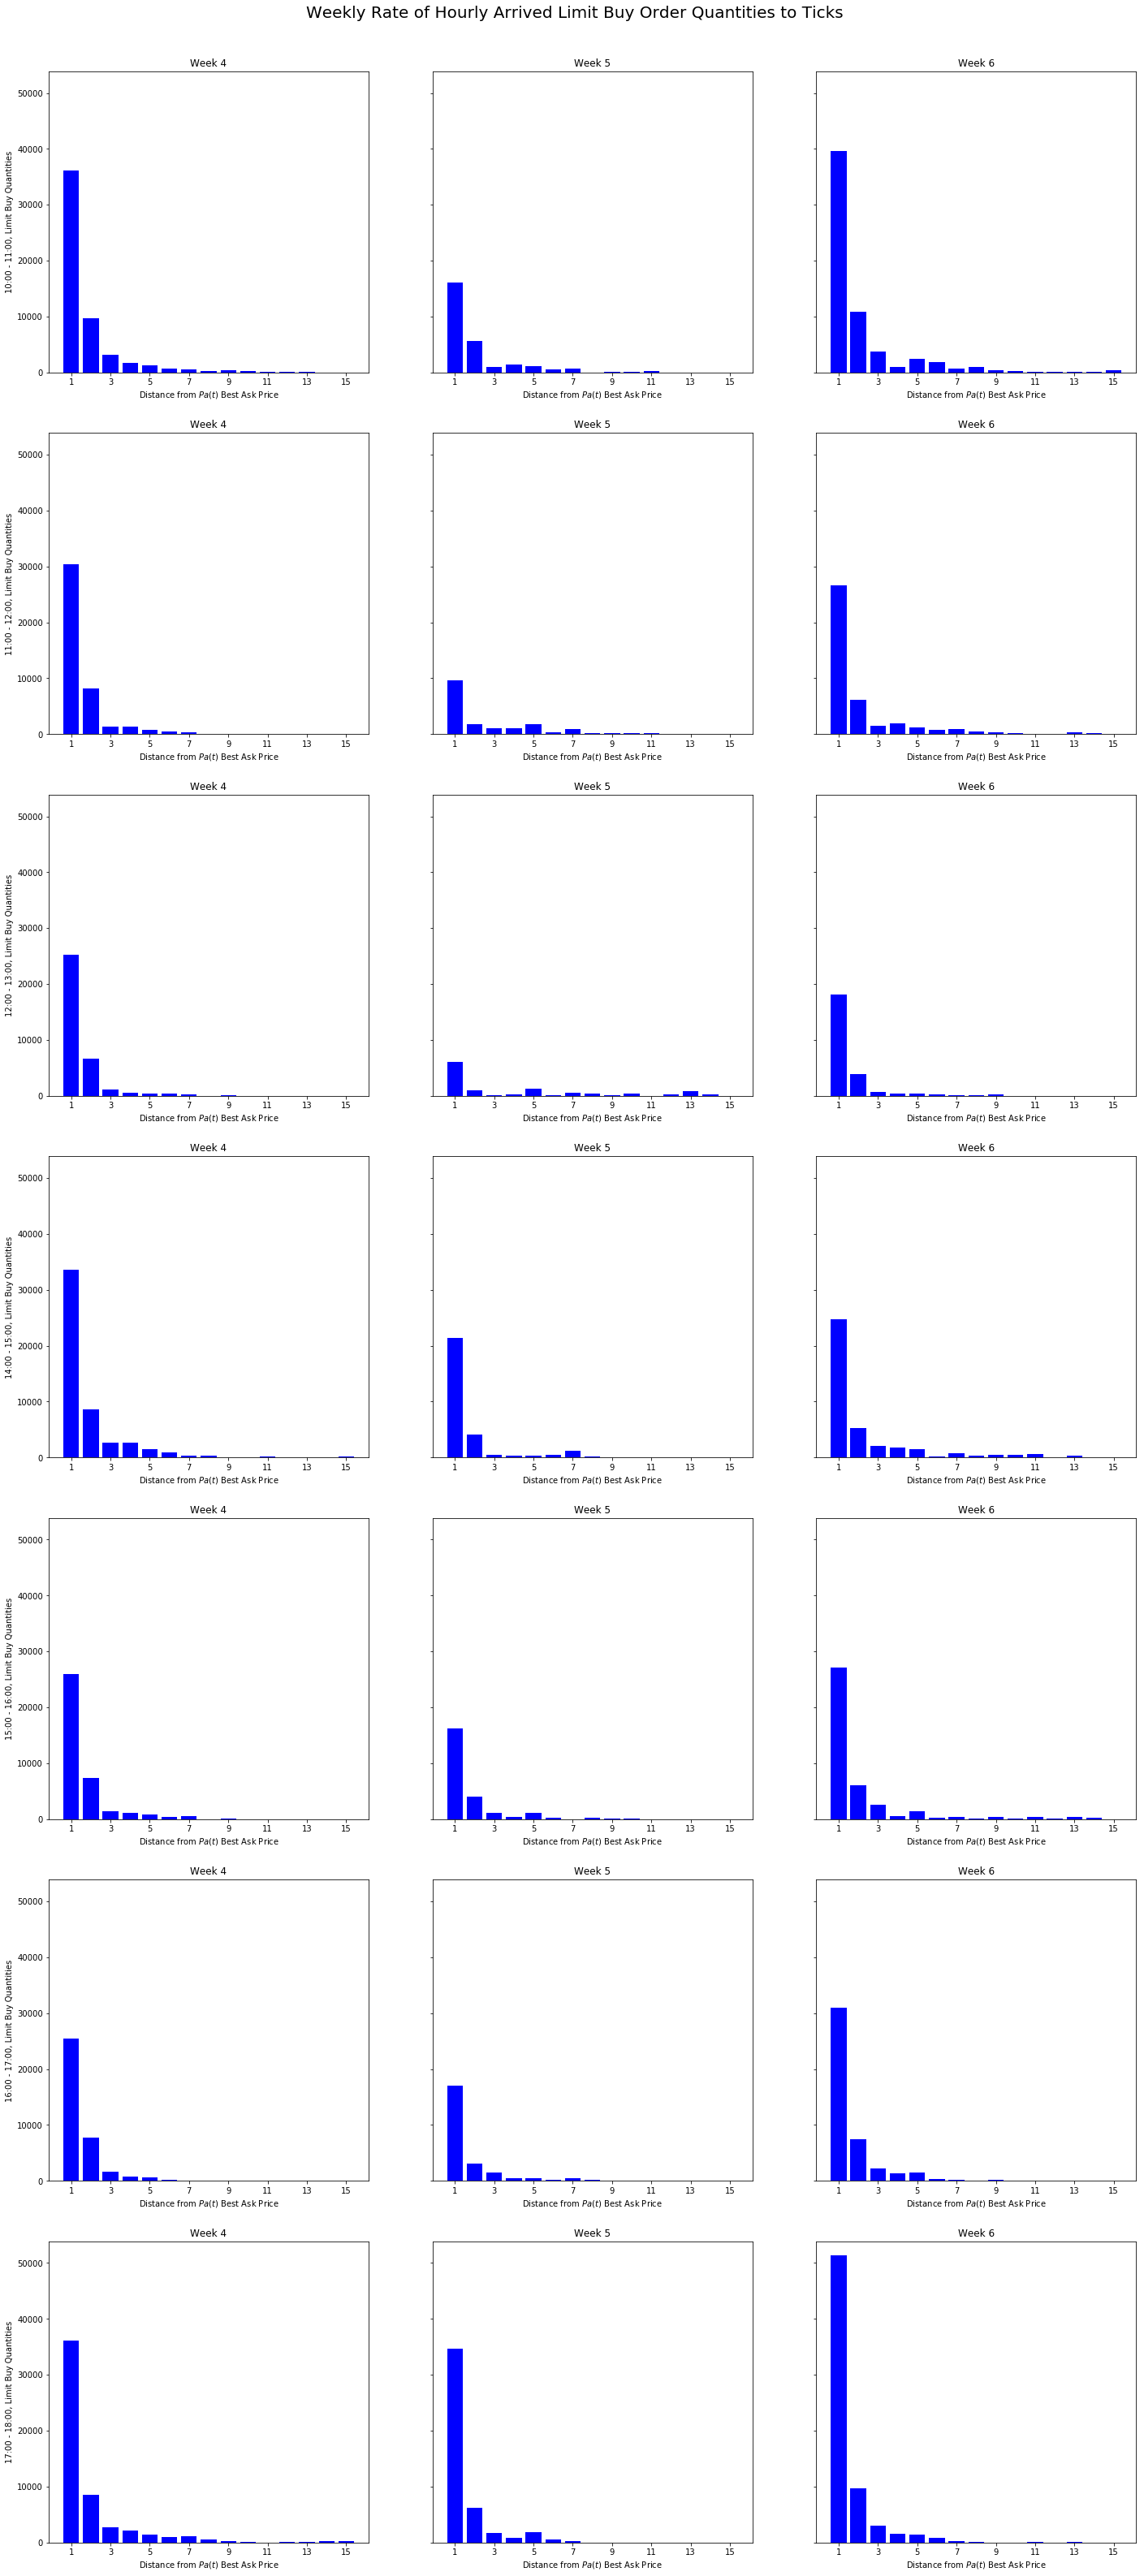

In [396]:
X = np.arange(1,16)
f, axes = plt.subplots(7, 3, sharey=True, figsize=(24,56))
f.suptitle('Weekly Rate of Hourly Arrived Limit Buy Order Quantities to Ticks', fontsize=20, y =.9)

hour_order = 1
hours = ['10:00 - 11:00', '11:00 - 12:00', '12:00 - 13:00', '14:00 - 15:00', '15:00 - 16:00', '16:00 - 17:00',
        '17:00 - 18:00']

for i in range(7):
    for j in range(3, 6):
        axes[i, j-3].bar(X, limit_buy_hourly_quantity_weekly[j][i], color='b')
        axes[i, j-3].title.set_text('Week ' + str(j+1))
        axes[i, 0].set_ylabel('{}, Limit Buy Quantities'.format(hours[i]))
        axes[i, j-3].set_xlabel('Distance from $Pa(t)$ Best Ask Price')
        axes[i, j-3].set_xticks(np.arange(1,16,2))

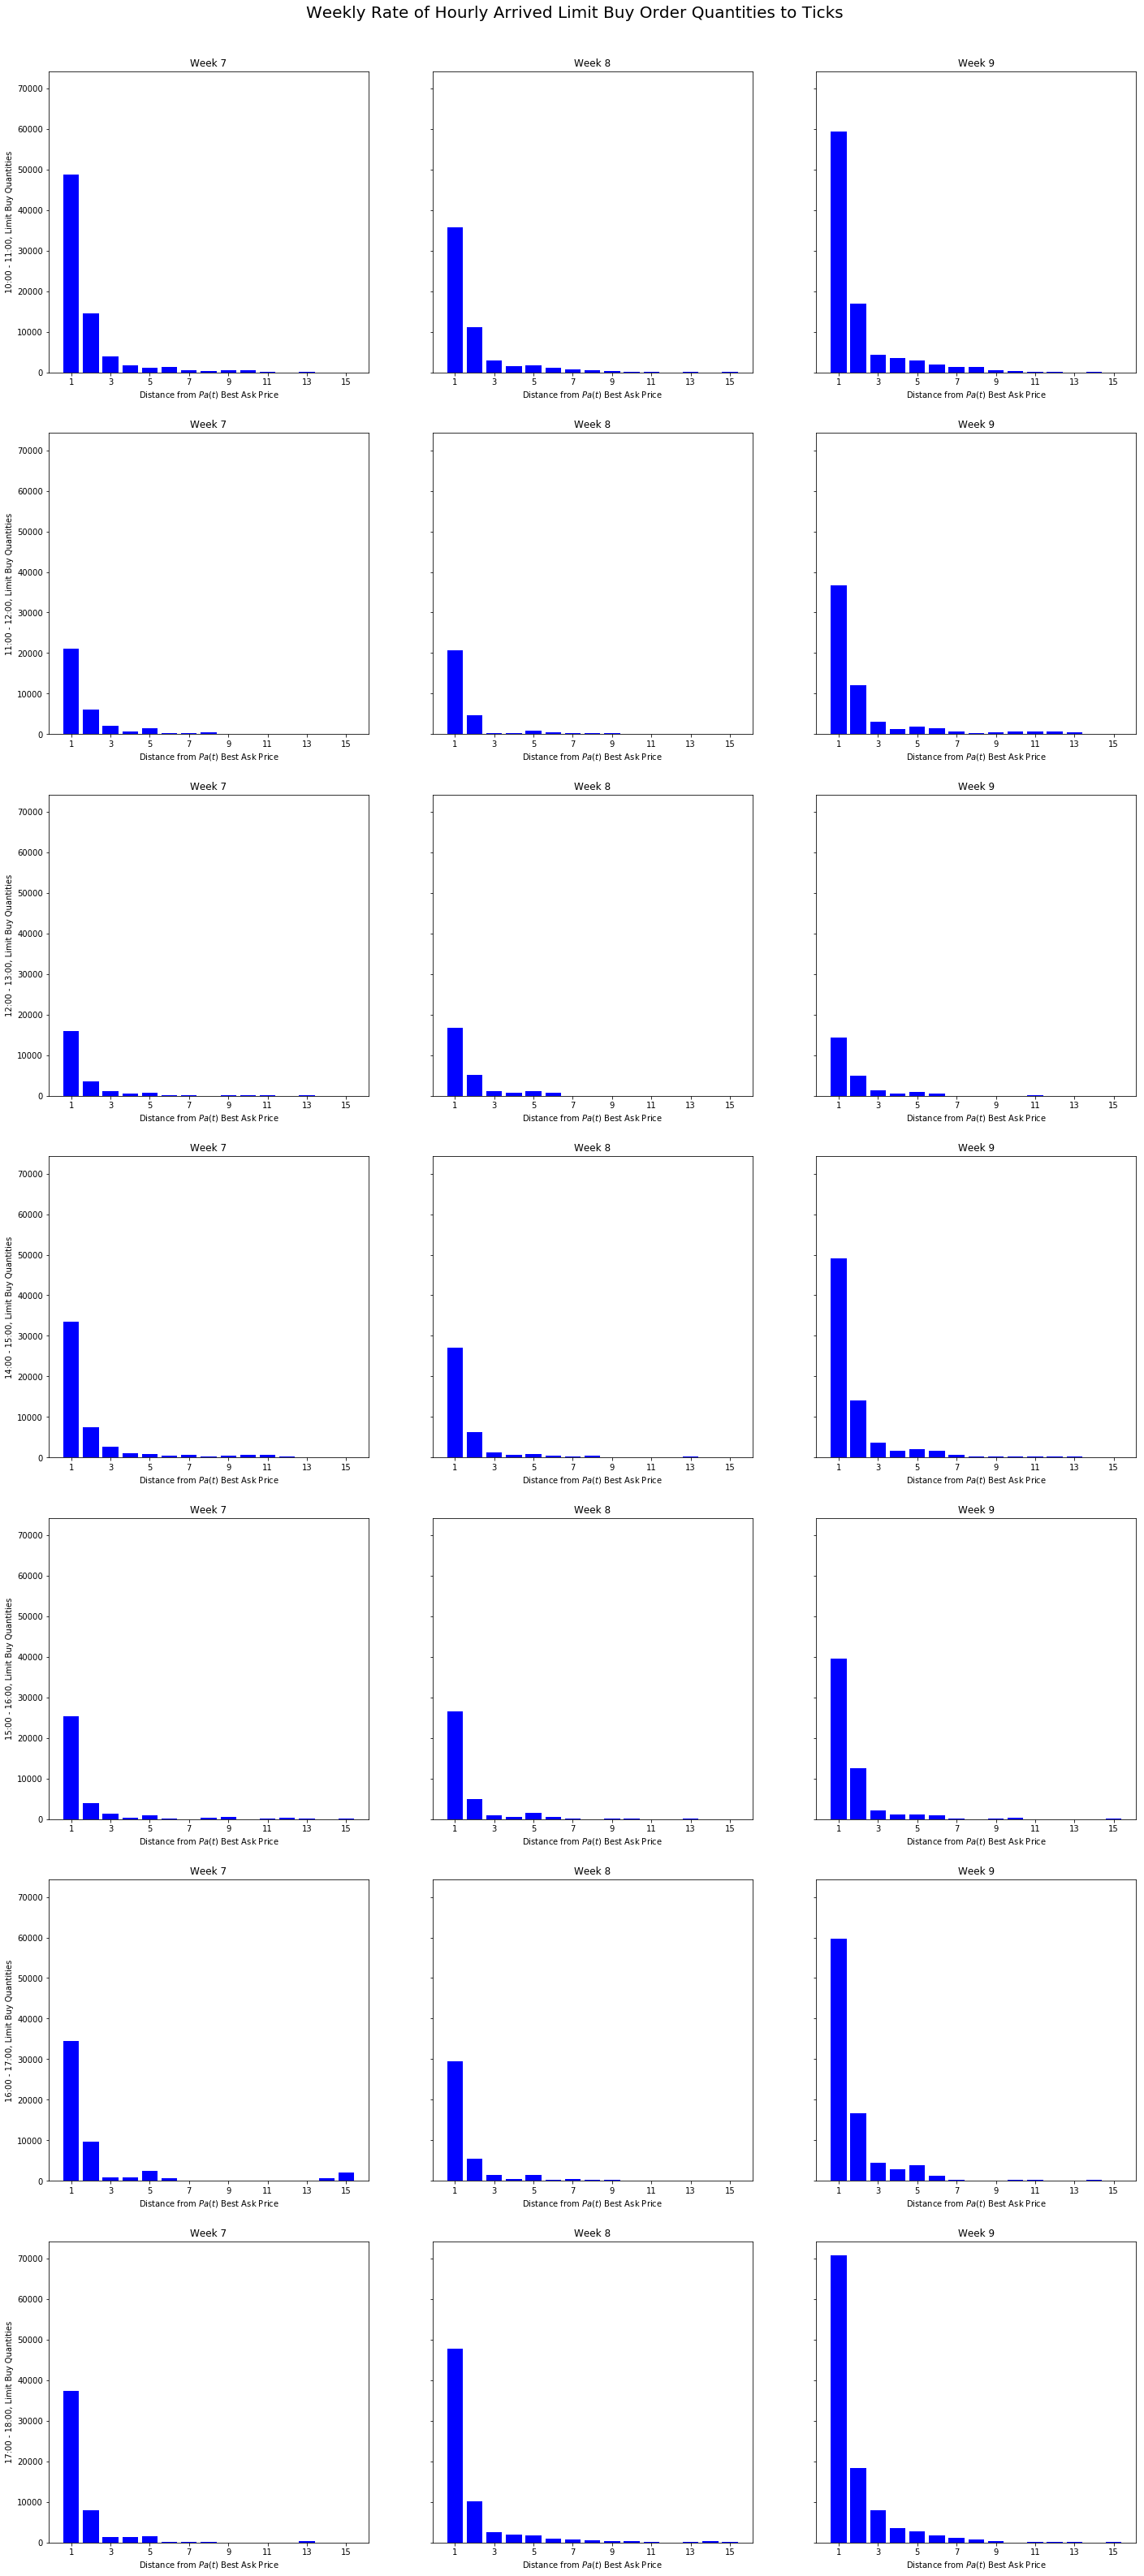

In [397]:
X = np.arange(1,16)
f, axes = plt.subplots(7, 3, sharey=True, figsize=(24,56))
f.suptitle('Weekly Rate of Hourly Arrived Limit Buy Order Quantities to Ticks', fontsize=20, y =.9)

hour_order = 1
hours = ['10:00 - 11:00', '11:00 - 12:00', '12:00 - 13:00', '14:00 - 15:00', '15:00 - 16:00', '16:00 - 17:00',
        '17:00 - 18:00']

for i in range(7):
    for j in range(6, 9):
        axes[i, j-6].bar(X, limit_buy_hourly_quantity_weekly[j][i], color='b')
        axes[i, j-6].title.set_text('Week ' + str(j+1))
        axes[i, 0].set_ylabel('{}, Limit Buy Quantities'.format(hours[i]))
        axes[i, j-6].set_xlabel('Distance from $Pa(t)$ Best Ask Price')
        axes[i, j-6].set_xticks(np.arange(1,16,2))